# Coding Discussion 4
### Cameron MacDonald
#### PPOL564

In [1]:
# load the necessary packages
import numpy as np
import pandas as pd
import requests
import csv
import copy
import seaborn

## Main Functions

In [2]:
# get a list of strings from the provided data file
def get_string_from_file(list_of_data_files):
    """
    This function reads in a list of text files as strings and stores each article in a list
    
    parameters:
        list_of_data_files:
            a list of file paths as strings
    returns:
        list of articles:
            a list of strings from the text data files
    """
    # initialize a length 5 None list for storing values
    list_of_articles = [None] * 5
    
    # iterate through each of the data files
    for index, data in enumerate(list_of_data_files):
        
        # open the file with utf8 encoding to avoid funky characters
        with open(data, 'r', encoding = 'utf8') as file:
            
            # read in the actual file as a string
            article = file.read()
            
            # fix typos in CNN article
            article = article.replace('.', ' ')
            
            # remove all characters that are not spaces or alphabetical
            article = ''.join(ch for ch in article if (ch.isalpha() or ch.isspace() == True))
            
            # store each string in its file's index position on the new list
            list_of_articles[index] = article
            
    # return the list
    return list_of_articles

In [3]:
# get the stop words

# open the file
file = open("Data/stop_words.csv", 'r')

# get the file into a list
stopwords = list(csv.reader(file))

# use list comprehension so it is not a list within a list
stopwords = [word[0] for word in stopwords]

# remove characters that are not alphebetical, to work with function below
stopwords = [''.join(ch for ch in word if ch.isalpha()== True) for word in stopwords]

# close the file
file.close()

In [4]:
# take the acquired list of strings and 'tokenize' each one
def tokenize(list_of_strings, stopwords):
    """
    This function takes in a list of strings, clears the punctuation, and splits by ' '
    
    parameters:
        list_of_strings:
            a list of article strings
        stopwords
            a list of word strings to delete
    output:
        strings_for_analysis:
            a list of 'tokenized' strings
    """
    # initialize a length 5 None list for storing values
    strings_for_analysis = [None] * 5
    
    #iterate through each string
    for index, string in enumerate(list_of_strings):
        
        string = string.lower() # lower case all characters in the string
        string = string.replace('/n', '') # remove line break
        string = string.split() # split each string with space delimiter
        string = [word for word in string if word not in stopwords]
        strings_for_analysis[index] = string # store each string by its index
    
    # return the list
    return strings_for_analysis

In [5]:
# this function will turn the strings for analysis into a pandas data frame
# the data frame will have a 'count' for each word and 0 for words not present in the string

def data_frame_maker(list_of_strings):
    """
    The function makes the list of strings into rows of a data frame and stores them in a data frame where the value is the count of each word per string.
    
    parameters:
        list_of_strings
            a list of strings that are words
    returns:
        a dataframe
    """
    # create the data frame for appending
    data_for_matrix_evaluation = pd.DataFrame()
    
    # iterate through each article in the list_of_strings
    for article in list_of_strings:
        
        # initialize an empty dictionary within the string
        dict_loop = dict()
        
        # iterate through each word in each article's list of strings
        for word in article:
            
            # if the word is already in the dictionary add one to the entry to keep a count
            if word in dict_loop:
                dict_loop[word][0] += 1
            
            # if the word is not in the dictionary add the word as a key and set its entry to 1
            else:
                dict_loop[word] = [1]
        
        # append the article's dictionary into the data frame
        data_for_matrix_evaluation = data_for_matrix_evaluation.append(pd.DataFrame(dict_loop), ignore_index = True, sort = True)
    
    # fill the empty values with 0
    data_for_matrix_evaluation.fillna(0, inplace = True)
    
    # return the matrix
    return data_for_matrix_evaluation

## Analysis

In [6]:
# get the list of files
list_of_files = ['Data/aljazeera-khashoggi.txt', 'data/bbc-khashoggi.txt', 'Data/cnn-khashoggi.txt', "Data/fox-khashoggi.txt", 'Data/breitbart-khashoggi.txt']

#### Canned Stopwords

In [7]:
# get each files content as a string
list_of_articles = get_string_from_file(list_of_files)

In [8]:
# tokenize the contents of each article string with the initial list of stopwords
strings_for_analysis = tokenize(list_of_articles, stopwords)

In [9]:
# make the data frame
data_frame = data_frame_maker(strings_for_analysis)

In [10]:
# get the cosine between the two vectors
def cosine(a,b):
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos

In [11]:
# store each row as a vector
a = data_frame.iloc[0].values
b = data_frame.iloc[1].values
c = data_frame.iloc[2].values
d = data_frame.iloc[3].values
e = data_frame.iloc[4].values

<AxesSubplot:>

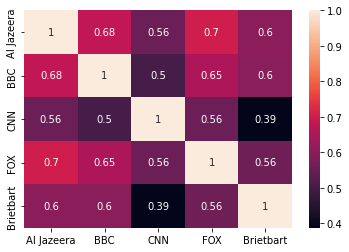

In [12]:
# calculate similarities and store them in a list
similarity_a = [1.0 , round(cosine(a,b), 3), round(cosine(a,c), 3), round(cosine(a,d), 3), round(cosine(a,e), 3)]
similarity_b = [round(cosine(b,a), 3), 1.0, round(cosine(b,c), 3), round(cosine(b,d), 3), round(cosine(b,e), 3)]
similarity_c = [round(cosine(c,a), 3), round(cosine(c,b), 3), 1.0, round(cosine(c,d), 3), round(cosine(c,e), 3)]
similarity_d = [round(cosine(d,a), 3), round(cosine(d,b), 3), round(cosine(d,c), 3), 1.0, round(cosine(d,e), 3)]
similarity_e = [round(cosine(e,a), 3), round(cosine(e,b), 3), round(cosine(e,c), 3), round(cosine(e,d), 3), 1.0]

# save a list of these lists
similarities = [similarity_a, similarity_b, similarity_c,similarity_d,similarity_e]

# create a list of headings for columns and the index
index_and_columns = ['Al Jazeera', 'BBC', 'CNN', 'FOX', 'Brietbart']

# create a data frame with column and index names
visualization_df = pd.DataFrame(data = similarities, columns = index_and_columns, index = index_and_columns)

# create an annotated heatmap
seaborn.heatmap(visualization_df, annot = visualization_df)

In [13]:
# review the max values for each row for whether they should be considered for removal
data_frame.idxmax(axis=1)

0      saudi
1      saudi
2    erdogan
3    erdogan
4      saudi
dtype: object

#### Additional Stopwords

In [29]:
# create a deepcopy of stopwords
stopwords2 = copy.deepcopy(stopwords)

# extend stopwords2 with words from previous step and general intuition
stopwords2.extend(['khashoggi', 'khashoggis',  'pm', 'am', 'saudi', 'arabias', 'arabia' 'jamal', 'istanbul', 'erdogan', 'turkish', 'consulate', 'president', 'salman', 'bin', 'mohammed' ,'mbs', 'trump', 'donald', 'foreign', 'minister', 'crown', 'prince', 'ankara', 'yelova', 'yalova', 'riyadh'])

In [30]:
# run the function for tokenization with the new stopwords
strings_for_analysis = tokenize(list_of_articles, stopwords2)

# create a new data frame with new results
data_frame2 = data_frame_maker(strings_for_analysis)

In [31]:
# get the vectors for each column
a = data_frame2.iloc[0].values
b = data_frame2.iloc[1].values
c = data_frame2.iloc[2].values
d = data_frame2.iloc[3].values
e = data_frame2.iloc[4].values

<AxesSubplot:>

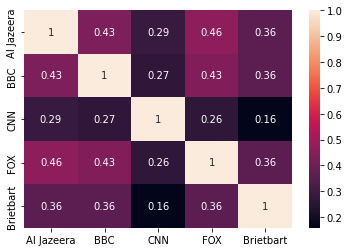

In [32]:
# make the similarity list
similarity_a = [1.0, round(cosine(a,b), 3), round(cosine(a,c), 3), round(cosine(a,d), 3), round(cosine(a,e), 3)]
similarity_b = [round(cosine(b,a), 3), 1.0, round(cosine(b,c), 3), round(cosine(b,d), 3), round(cosine(b,e), 3)]
similarity_c = [round(cosine(c,a), 3), round(cosine(c,b), 3), 1.0, round(cosine(c,d), 3), round(cosine(c,e), 3)]
similarity_d = [round(cosine(d,a), 3), round(cosine(d,b), 3), round(cosine(d,c), 3), 1.0, round(cosine(d,e), 3)]
similarity_e = [round(cosine(e,a), 3), round(cosine(e,b), 3), round(cosine(e,c), 3), round(cosine(e,d), 3), 1.0,]

# save as a list of lists
similarities = [similarity_a, similarity_b, similarity_c,similarity_d,similarity_e]

# create the heatmap with labelling
index_and_columns = ['Al Jazeera', 'BBC', 'CNN', 'FOX', 'Brietbart']
visualization_df = pd.DataFrame(data = similarities, columns = index_and_columns, index = index_and_columns)
seaborn.heatmap(visualization_df, annot = visualization_df)

In [18]:
# review for new stopwords
data_frame2.idxmax(axis=1)

0     murder
1      media
2     killed
3    killing
4      audio
dtype: object

#### No Stopwords

In [21]:
stopwords3 = []

In [22]:
# run the function for tokenization with the new stopwords
strings_for_analysis = tokenize(list_of_articles, stopwords3)

# create a new data frame with new results
data_frame3 = data_frame_maker(strings_for_analysis)

In [23]:
# get the vectors for each column
a = data_frame3.iloc[0].values
b = data_frame3.iloc[1].values
c = data_frame3.iloc[2].values
d = data_frame3.iloc[3].values
e = data_frame3.iloc[4].values

<AxesSubplot:>

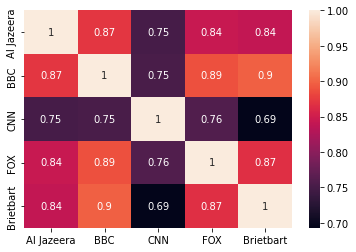

In [24]:
# make the similarity list
similarity_a = [1.0, round(cosine(a,b), 3), round(cosine(a,c), 3), round(cosine(a,d), 3), round(cosine(a,e), 3)]
similarity_b = [round(cosine(b,a), 3), 1.0, round(cosine(b,c), 3), round(cosine(b,d), 3), round(cosine(b,e), 3)]
similarity_c = [round(cosine(c,a), 3), round(cosine(c,b), 3), 1.0, round(cosine(c,d), 3), round(cosine(c,e), 3)]
similarity_d = [round(cosine(d,a), 3), round(cosine(d,b), 3), round(cosine(d,c), 3), 1.0, round(cosine(d,e), 3)]
similarity_e = [round(cosine(e,a), 3), round(cosine(e,b), 3), round(cosine(e,c), 3), round(cosine(e,d), 3), 1.0,]

# save as a list of lists
similarities = [similarity_a, similarity_b, similarity_c,similarity_d,similarity_e]

# create the heatmap with labelling
index_and_columns = ['Al Jazeera', 'BBC', 'CNN', 'FOX', 'Brietbart']
visualization_df = pd.DataFrame(data = similarities, columns = index_and_columns, index = index_and_columns)
seaborn.heatmap(visualization_df, annot = visualization_df)

### Insights

Here, we ran the data with three sets of stop words generating heatmaps for the cosine similarity of each news article with each other. We see that the final plot, with no stop words (as expected) yields the largest cosine similarity values. The list of canned stopwords provided by Professor Dunford drops each of the cosine similarity values dramatically. The lowest value on the no stopwords similarity matrix is ~0.69, in the canned stopwords list this value is ~0.39. While the two stories that are most different do not change, we have a better picture of their actual relationship. We can think of the common words in the english language as noise (that all articles will use frequently). Removing the stopwords is removing some of that noise. In this case of analyzing these particular articles, there are words that they will all use in common (such as the names of key figures, countries, nationalities, and locations). There is some risk in doing this as there is some narrative discretion in which figures are named. For this reason I removed the names of all leaders who appeared in the text. One could certainly run the same set of functions without removing political figures to get a 'delta' on the change. 

As for the merit of our text analysis, it is unsurprising to see that American media outlets thought of as being in direct opposition (Brietbart and CNN) tell very different stories. What may be surprising to an American media consumer is the similarity between Fox and Brietbert to Al Jazeera and BBC relative to CNN, whose article is the most 'distinct.' But there are a variety of reasons why this might be the case, including using similar sources. Another interesting detail is the use of 'killed' and 'killing' relative to 'murder' (very common in the Al Jazeera) in the major American press outlets.